#  TMDB Movie Analysis - Complete Workflow

##  IMPORTANT: Before You Start

### Quick Start Guide:
1. **Run ALL cells in order** - Press `Kernel → Restart & Run All` from the menu
2. **OR** Execute cells sequentially starting from the **Setup cell below**



### Prerequisites:
-  TMDB API Key configured in `env/.env`
-  All dependencies installed: `pip install -r requirements.txt`
-  Running from project root directory

---

# TMDB Movie Analysis Project

## Project Overview

This notebook presents a comprehensive analysis of movies from The Movie Database (TMDB) API. The project demonstrates end-to-end data engineering and analysis skills including:

- **Data Collection**: Fetching movie data via TMDB API
- **Data Cleaning**: Processing and transforming raw data
- **KPI Analysis**: Calculating key performance indicators
- **Data Visualization**: Creating insights through visual representations

---



## Setup and Configuration

First, we import all necessary libraries and modules.

In [1]:
import sys
import pandas as pd
from pathlib import Path
from IPython.display import Image, display

notebook_dir = Path.cwd()
src_path = notebook_dir / 'src'

if not src_path.exists():
    print(f" Error: 'src' folder not found at {notebook_dir}")
    print(f"   Current directory: {notebook_dir}")
    print(f"   Please ensure you're running this notebook from the project root directory.")
    raise FileNotFoundError(f"'src' folder not found at {src_path}")

sys.path.insert(0, str(src_path))

try:
    from utils.config_loader import load_config
    from api.fetch_data import fetch_movie_data
    from utils.data_cleaner import load_raw_data, clean_movie_data
    from analysis.kpi_analysis import (
        movie_performance_kpis,
        franchise_vs_standalone,
        most_successful_franchises,
        most_successful_directors,
        advanced_movie_searches
    )
    from visualization.visualizations import generate_all_visualizations
    
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    
    print("✅ All modules loaded successfully!")
    print(f" Working directory: {notebook_dir}")
    print(f" Python path includes: {src_path}")
    
except ImportError as e:
    print(f" Import Error: {e}")
    print(f"\n Current directory: {notebook_dir}")
    print(f" Looking for src at: {src_path}")
    print(f"\nPlease ensure:")
    print("  1. You're in the project root directory")
    print("  2. The 'src' folder exists with all modules")
    raise

✅ All modules loaded successfully!
 Working directory: C:\Users\PatrickIradukunda\Desktop\de-upskilling\tmdb-movie-project
 Python path includes: C:\Users\PatrickIradukunda\Desktop\de-upskilling\tmdb-movie-project\src


---

## Step 1: Data Collection

### Methodology

Fetch movie data from TMDB API for a curated list of popular and diverse movies.
- Basic information (title, release date, budget, revenue)
- Genre classification
- Cast and crew details
- User ratings and popularity metrics


In [2]:
if 'load_config' not in dir():
    print(" Modules not loaded! Running setup first...")
    import sys
    from pathlib import Path
    sys.path.insert(0, str(Path.cwd() / 'src'))
    from utils.config_loader import load_config
    from api.fetch_data import fetch_movie_data

api_key = load_config()

movie_ids = [
    299534, 19995, 140607, 299536, 597, 135397,
    420818, 24428, 168259, 99861, 284054, 12445,
    181808, 330457, 351286, 109445, 321612, 260513
]

print("🎬 Fetching movie data from TMDB API...")
movies = fetch_movie_data(api_key, movie_ids)
print(f"✅ Successfully fetched {len(movies)} movies")

🎬 Fetching movie data from TMDB API...
Saved 18 movies to C:\Users\PatrickIradukunda\Desktop\de-upskilling\tmdb-movie-project\data\movies_raw.json
✅ Successfully fetched 18 movies


---

## Step 2: Data Cleaning & Transformation

### Methodology

The raw data undergoes several transformations:
- **Column Selection**: Remove unnecessary fields
- **Data Type Conversion**: Convert to appropriate types (numeric, datetime)
- **Missing Value Handling**: Remove or impute missing values
- **Feature Engineering**: Create new columns (budget_musd, revenue_musd)
- **Data Quality Checks**: Remove duplicates and invalid records

In [3]:
print(" Loading and cleaning movie data...")
df_raw = load_raw_data()
df_cleaned = clean_movie_data(df_raw)

print(f"\n📊 Dataset Overview:")
print(f"Total Movies: {len(df_cleaned)}")
print(f"Total Columns: {len(df_cleaned.columns)}")
print(f"\nColumn Names: {', '.join(df_cleaned.columns.tolist())}")

df_cleaned.head()

 Loading and cleaning movie data...
 Cleaned data saved to C:\Users\PatrickIradukunda\Desktop\de-upskilling\tmdb-movie-project\data\movies_cleaned.csv

📊 Dataset Overview:
Total Movies: 18
Total Columns: 20

Column Names: id, title, tagline, release_date, genres, director, cast, belongs_to_collection, original_language, budget_musd, revenue_musd, production_companies, production_countries, vote_count, vote_average, popularity, runtime, overview, spoken_languages, poster_path


,id,title,tagline,release_date,genres,director,cast,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure | Science Fiction | Action,Anthony Russo | Joe Russo,Robert Downey Jr. | Chris Evans | Mark Ruffalo...,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,United States of America,26868,8.237,16.4452,181.0,After the devastating events of Avengers: Infi...,English | Japanese | Xhosa,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action | Adventure | Fantasy | Science Fiction,James Cameron,Sam Worthington | Zoe Saldaña | Sigourney Weav...,Avatar Collection,en,237.0,2923.706026,Dune Entertainment | Lightstorm Entertainment ...,United States of America | United Kingdom,32748,7.600,26.9729,162.0,"In the 22nd century, a paraplegic Marine is di...",English | Spanish,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure | Action | Science Fiction,J.J. Abrams,Harrison Ford | Mark Hamill | Carrie Fisher | ...,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd. | Bad Robot,United States of America,20037,7.254,11.2373,136.0,Thirty years after defeating the Galactic Empi...,English,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure | Action | Science Fiction,Joe Russo | Anthony Russo,Robert Downey Jr. | Chris Evans | Chris Hemswo...,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,United States of America,31083,8.235,30.5675,149.0,As the Avengers and their allies have continue...,English | Xhosa,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg
4,597,Titanic,Nothing on earth could come between them.,1997-11-18,Drama | Romance,James Cameron,Leonardo DiCaprio | Kate Winslet | Billy Zane ...,,en,200.0,2264.162353,Paramount Pictures | 20th Century Fox | Lights...,United States of America,26428,7.904,28.3117,194.0,101-year-old Rose DeWitt Bukater tells the sto...,English | French | German | Swedish | Italian ...,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg


### Data Quality Summary

In [4]:
print("📈 Data Quality Metrics:\n")
print(df_cleaned.info())
print("\n" + "="*60)
print("Missing Values per Column:")
print("="*60)
missing = df_cleaned.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

📈 Data Quality Metrics:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     18 non-null     int64         
 1   title                  18 non-null     object        
 2   tagline                18 non-null     object        
 3   release_date           18 non-null     datetime64[ns]
 4   genres                 18 non-null     object        
 5   director               18 non-null     object        
 6   cast                   18 non-null     object        
 7   belongs_to_collection  18 non-null     object        
 8   original_language      18 non-null     object        
 9   budget_musd            18 non-null     float64       
 10  revenue_musd           18 non-null     float64       
 11  production_companies   18 non-null     object        
 12  production_countries   18 non-null     ob

Series([], dtype: int64)

---

## Step 3: KPI Analysis

### Key Performance Indicators

We analyze movies across multiple performance dimensions:
- **Financial Performance**: Revenue, Budget, Profit, ROI
- **Audience Engagement**: Ratings, Vote Count, Popularity
- **Franchise Analysis**: Franchise vs Standalone comparison

### 3.1 Movie Performance Rankings

In [5]:
kpis = movie_performance_kpis(df_cleaned)

for name, table in kpis.items():
    print(f"\n{'='*60}")
    print(f"📊 {name}")
    print(f"{'='*60}")
    print(table.to_string(index=False))


📊 Highest Revenue
                       title  revenue_musd
                      Avatar   2923.706026
           Avengers: Endgame   2799.439100
                     Titanic   2264.162353
Star Wars: The Force Awakens   2068.223624
      Avengers: Infinity War   2052.415039

📊 Highest Budget
                   title  budget_musd
 Avengers: Age of Ultron        365.0
       Avengers: Endgame        356.0
Star Wars: The Last Jedi        300.0
  Avengers: Infinity War        300.0
           The Lion King        260.0

📊 Highest Profit
                       title  profit_musd
                      Avatar  2686.706026
           Avengers: Endgame  2443.439100
                     Titanic  2064.162353
Star Wars: The Force Awakens  1823.223624
      Avengers: Infinity War  1752.415039

📊 Lowest Profit
                   title  profit_musd
Star Wars: The Last Jedi  1032.698830
 Avengers: Age of Ultron  1040.403694
           Incredibles 2  1043.225667
    Beauty and the Beast  1106.115964


### 3.2 Franchise vs Standalone Analysis

In [6]:
if 'belongs_to_collection' in df_cleaned.columns:
    print("🎬 Franchise vs Standalone Performance:\n")
    franchise_comparison = franchise_vs_standalone(df_cleaned)
    print(franchise_comparison)
    
    print("\n" + "="*60)
    print(" Most Successful Franchises:")
    print("="*60)
    print(most_successful_franchises(df_cleaned))

🎬 Franchise vs Standalone Performance:

              revenue_musd   roi  budget_musd  popularity  vote_average
is_franchise                                                           
Standalone         1765.14  9.62       180.00       20.47          7.44
Franchise          1682.67  7.79       226.12       17.94          7.39

 Most Successful Franchises:
                          movie_count  total_budget  mean_budget  \
belongs_to_collection                                              
The Avengers Collection             4        1241.0       310.25   
                                    2         360.0       180.00   
Star Wars Collection                2         545.0       272.50   
Jurassic Park Collection            2         320.0       160.00   
Avatar Collection                   1         237.0       237.00   

                          total_revenue  mean_revenue  mean_rating  
belongs_to_collection                                               
The Avengers Collection    

### 3.3 Director Analysis

In [7]:
if 'director' in df_cleaned.columns:
    print(" Most Successful Directors:\n")
    print(most_successful_directors(df_cleaned))

 Most Successful Directors:

                           movies_directed  total_revenue  mean_rating
director                                                              
James Cameron                            2        5187.87         7.75
Joss Whedon                              2        2924.22         7.57
Anthony Russo | Joe Russo                1        2799.44         8.24
J.J. Abrams                              1        2068.22         7.25
Joe Russo | Anthony Russo                1        2052.42         8.24


### 3.4 Advanced Movie Searches

In [8]:
advanced_movie_searches(df_cleaned)


🎬 Best-rated Sci-Fi Action movies starring Bruce Willis:
No results found.

🎞️ Movies starring Uma Thurman directed by Quentin Tarantino:
No results found.


---

## Step 4: Data Visualization

### Visualization Strategy

We create five key visualizations to uncover insights:
1. **Revenue vs Budget**: Identify profitability patterns
2. **ROI by Genre**: Discover which genres yield best returns
3. **Popularity vs Rating**: Understand audience preferences
4. **Yearly Trends**: Track industry evolution over time
5. **Franchise Comparison**: Evaluate franchise vs standalone success

In [9]:
generate_all_visualizations(df_cleaned)


 Generating Data Visualizations...
 Saved visualization: C:\Users\PatrickIradukunda\Desktop\de-upskilling\tmdb-movie-project\data\visualizations\revenue_vs_budget.png
 Saved visualization: C:\Users\PatrickIradukunda\Desktop\de-upskilling\tmdb-movie-project\data\visualizations\roi_by_genre.png
 Saved visualization: C:\Users\PatrickIradukunda\Desktop\de-upskilling\tmdb-movie-project\data\visualizations\popularity_vs_rating.png
 Saved visualization: C:\Users\PatrickIradukunda\Desktop\de-upskilling\tmdb-movie-project\data\visualizations\yearly_trends.png
 Saved visualization: C:\Users\PatrickIradukunda\Desktop\de-upskilling\tmdb-movie-project\data\visualizations\franchise_vs_standalone.png
✅ All visualizations saved to: C:\Users\PatrickIradukunda\Desktop\de-upskilling\tmdb-movie-project\data\visualizations


### Visualization 1: Revenue vs Budget

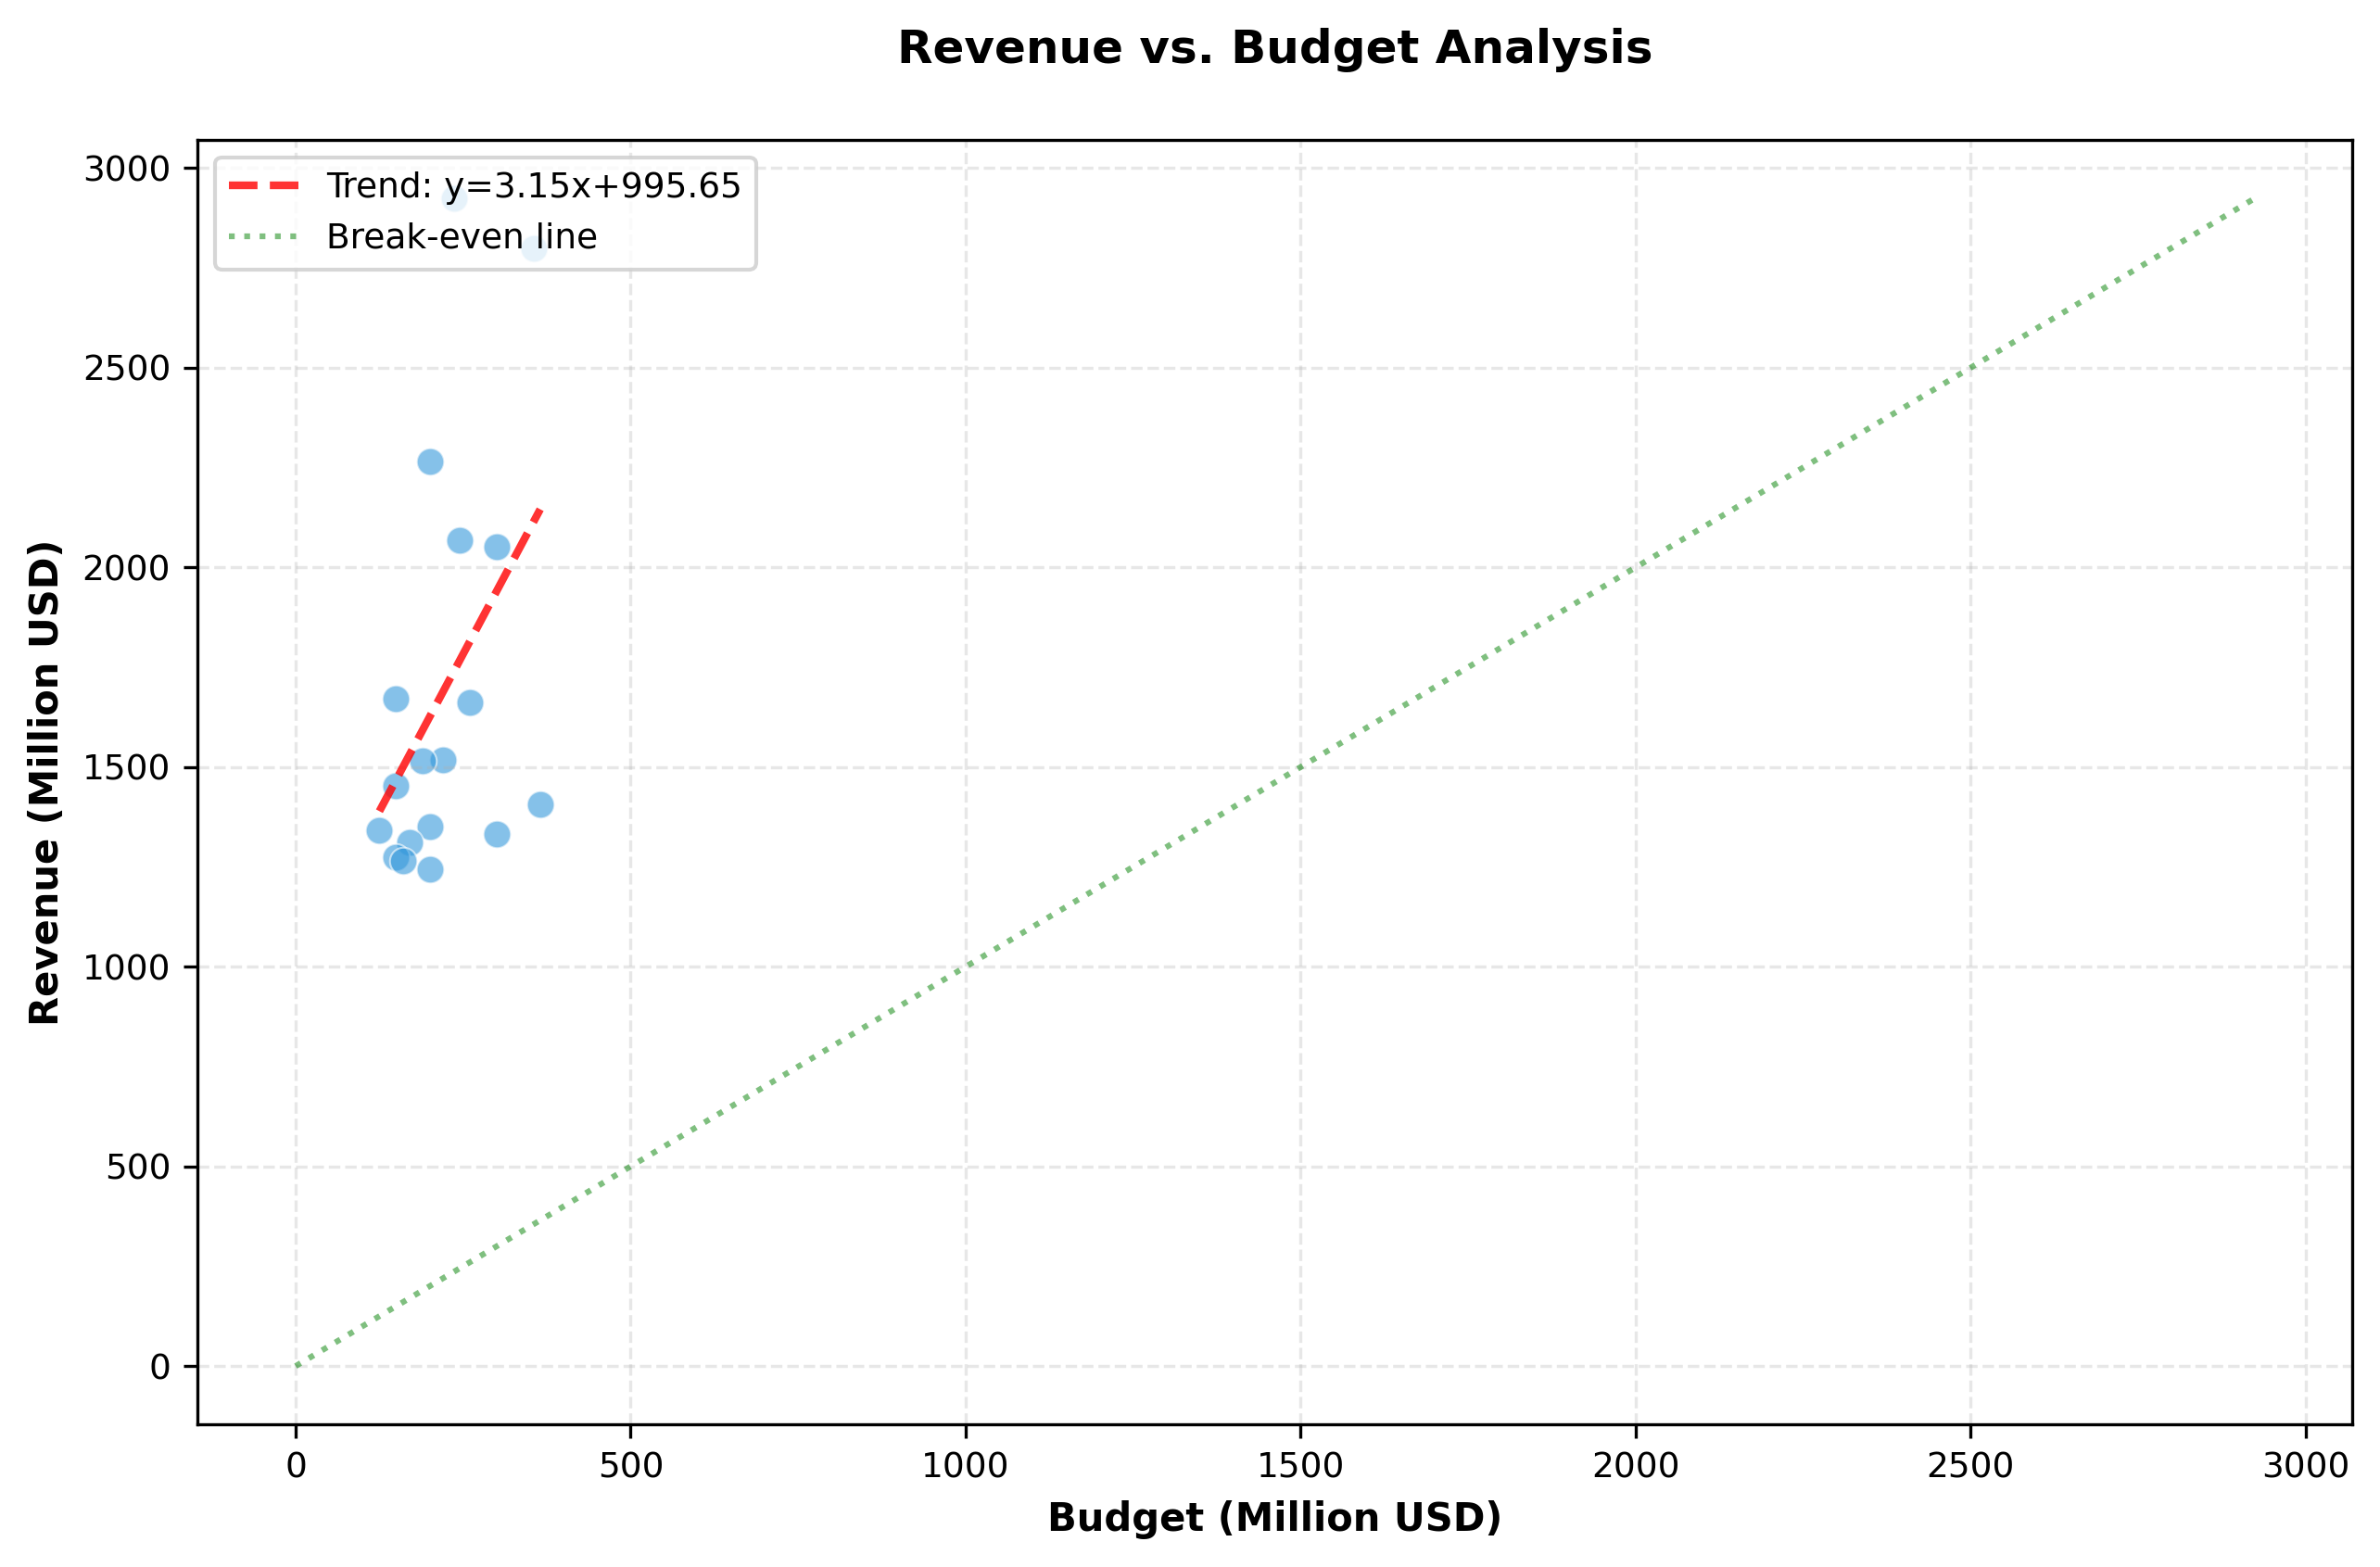

In [10]:
viz_path = Path.cwd() / 'data' / 'visualizations' / 'revenue_vs_budget.png'
if viz_path.exists():
    display(Image(filename=str(viz_path)))

### Visualization 2: ROI Distribution by Genre

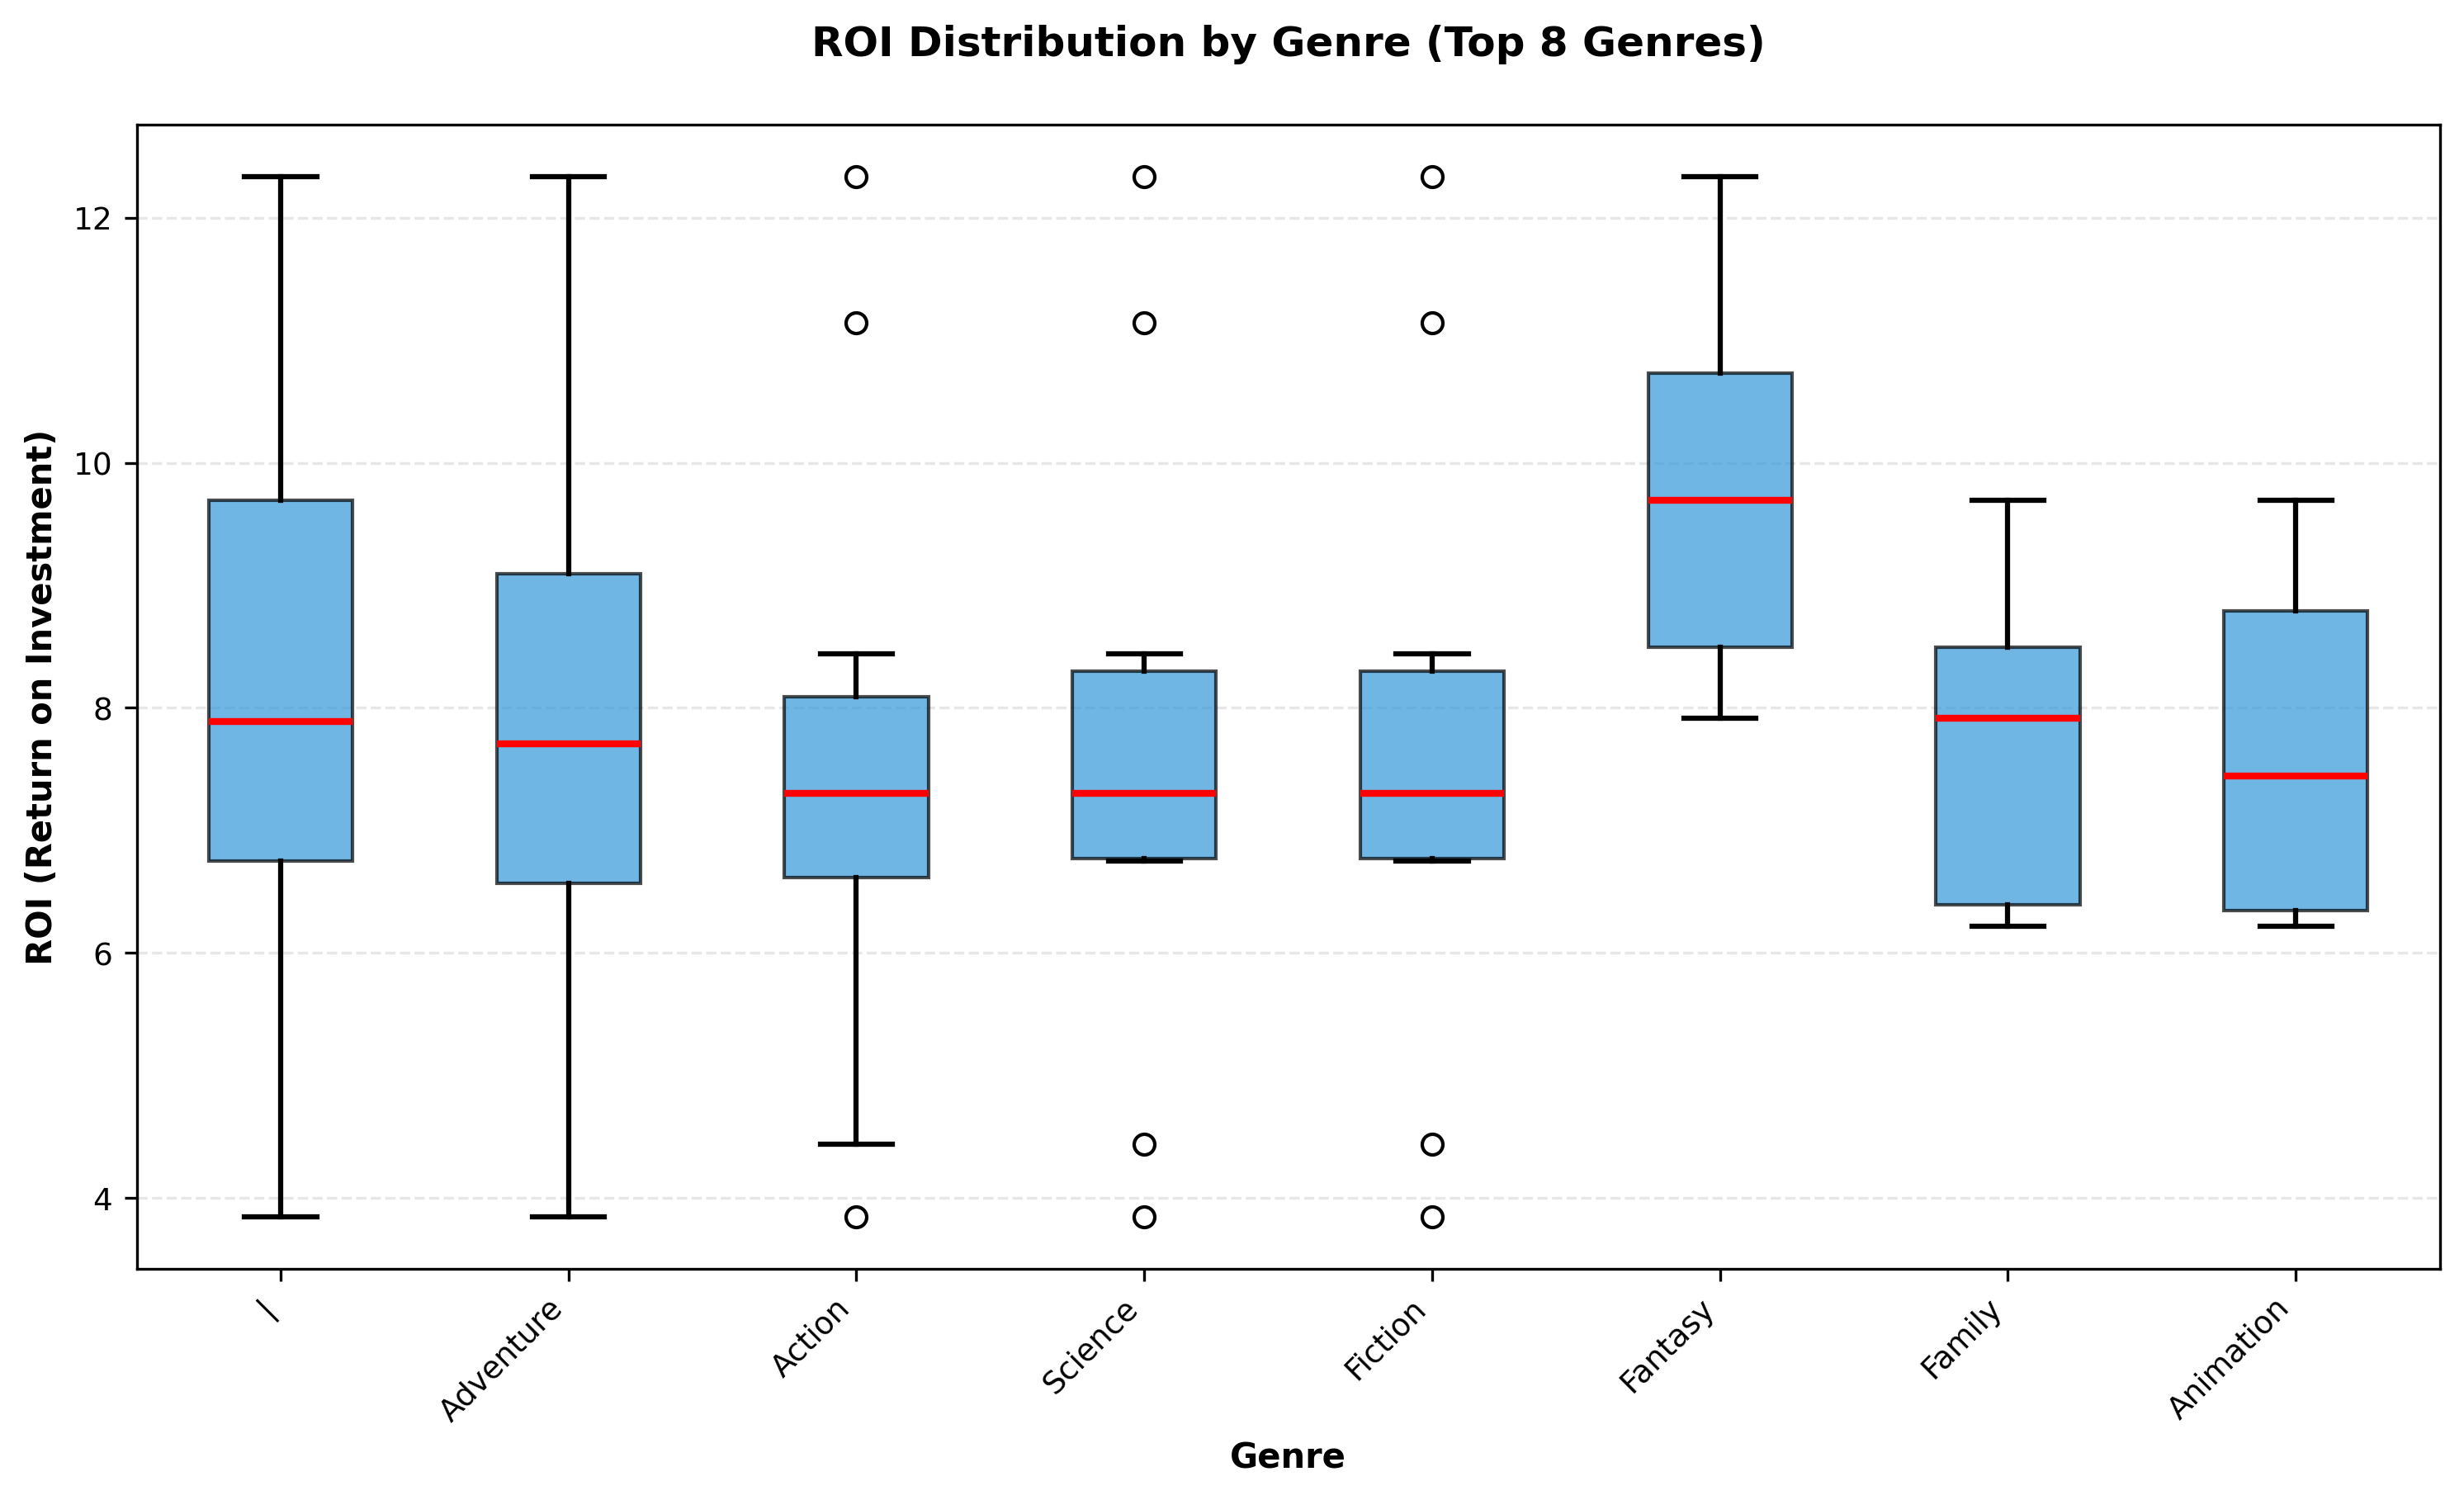

In [11]:
viz_path = Path.cwd() / 'data' / 'visualizations' / 'roi_by_genre.png'
if viz_path.exists():
    display(Image(filename=str(viz_path)))

### Visualization 3: Popularity vs Rating

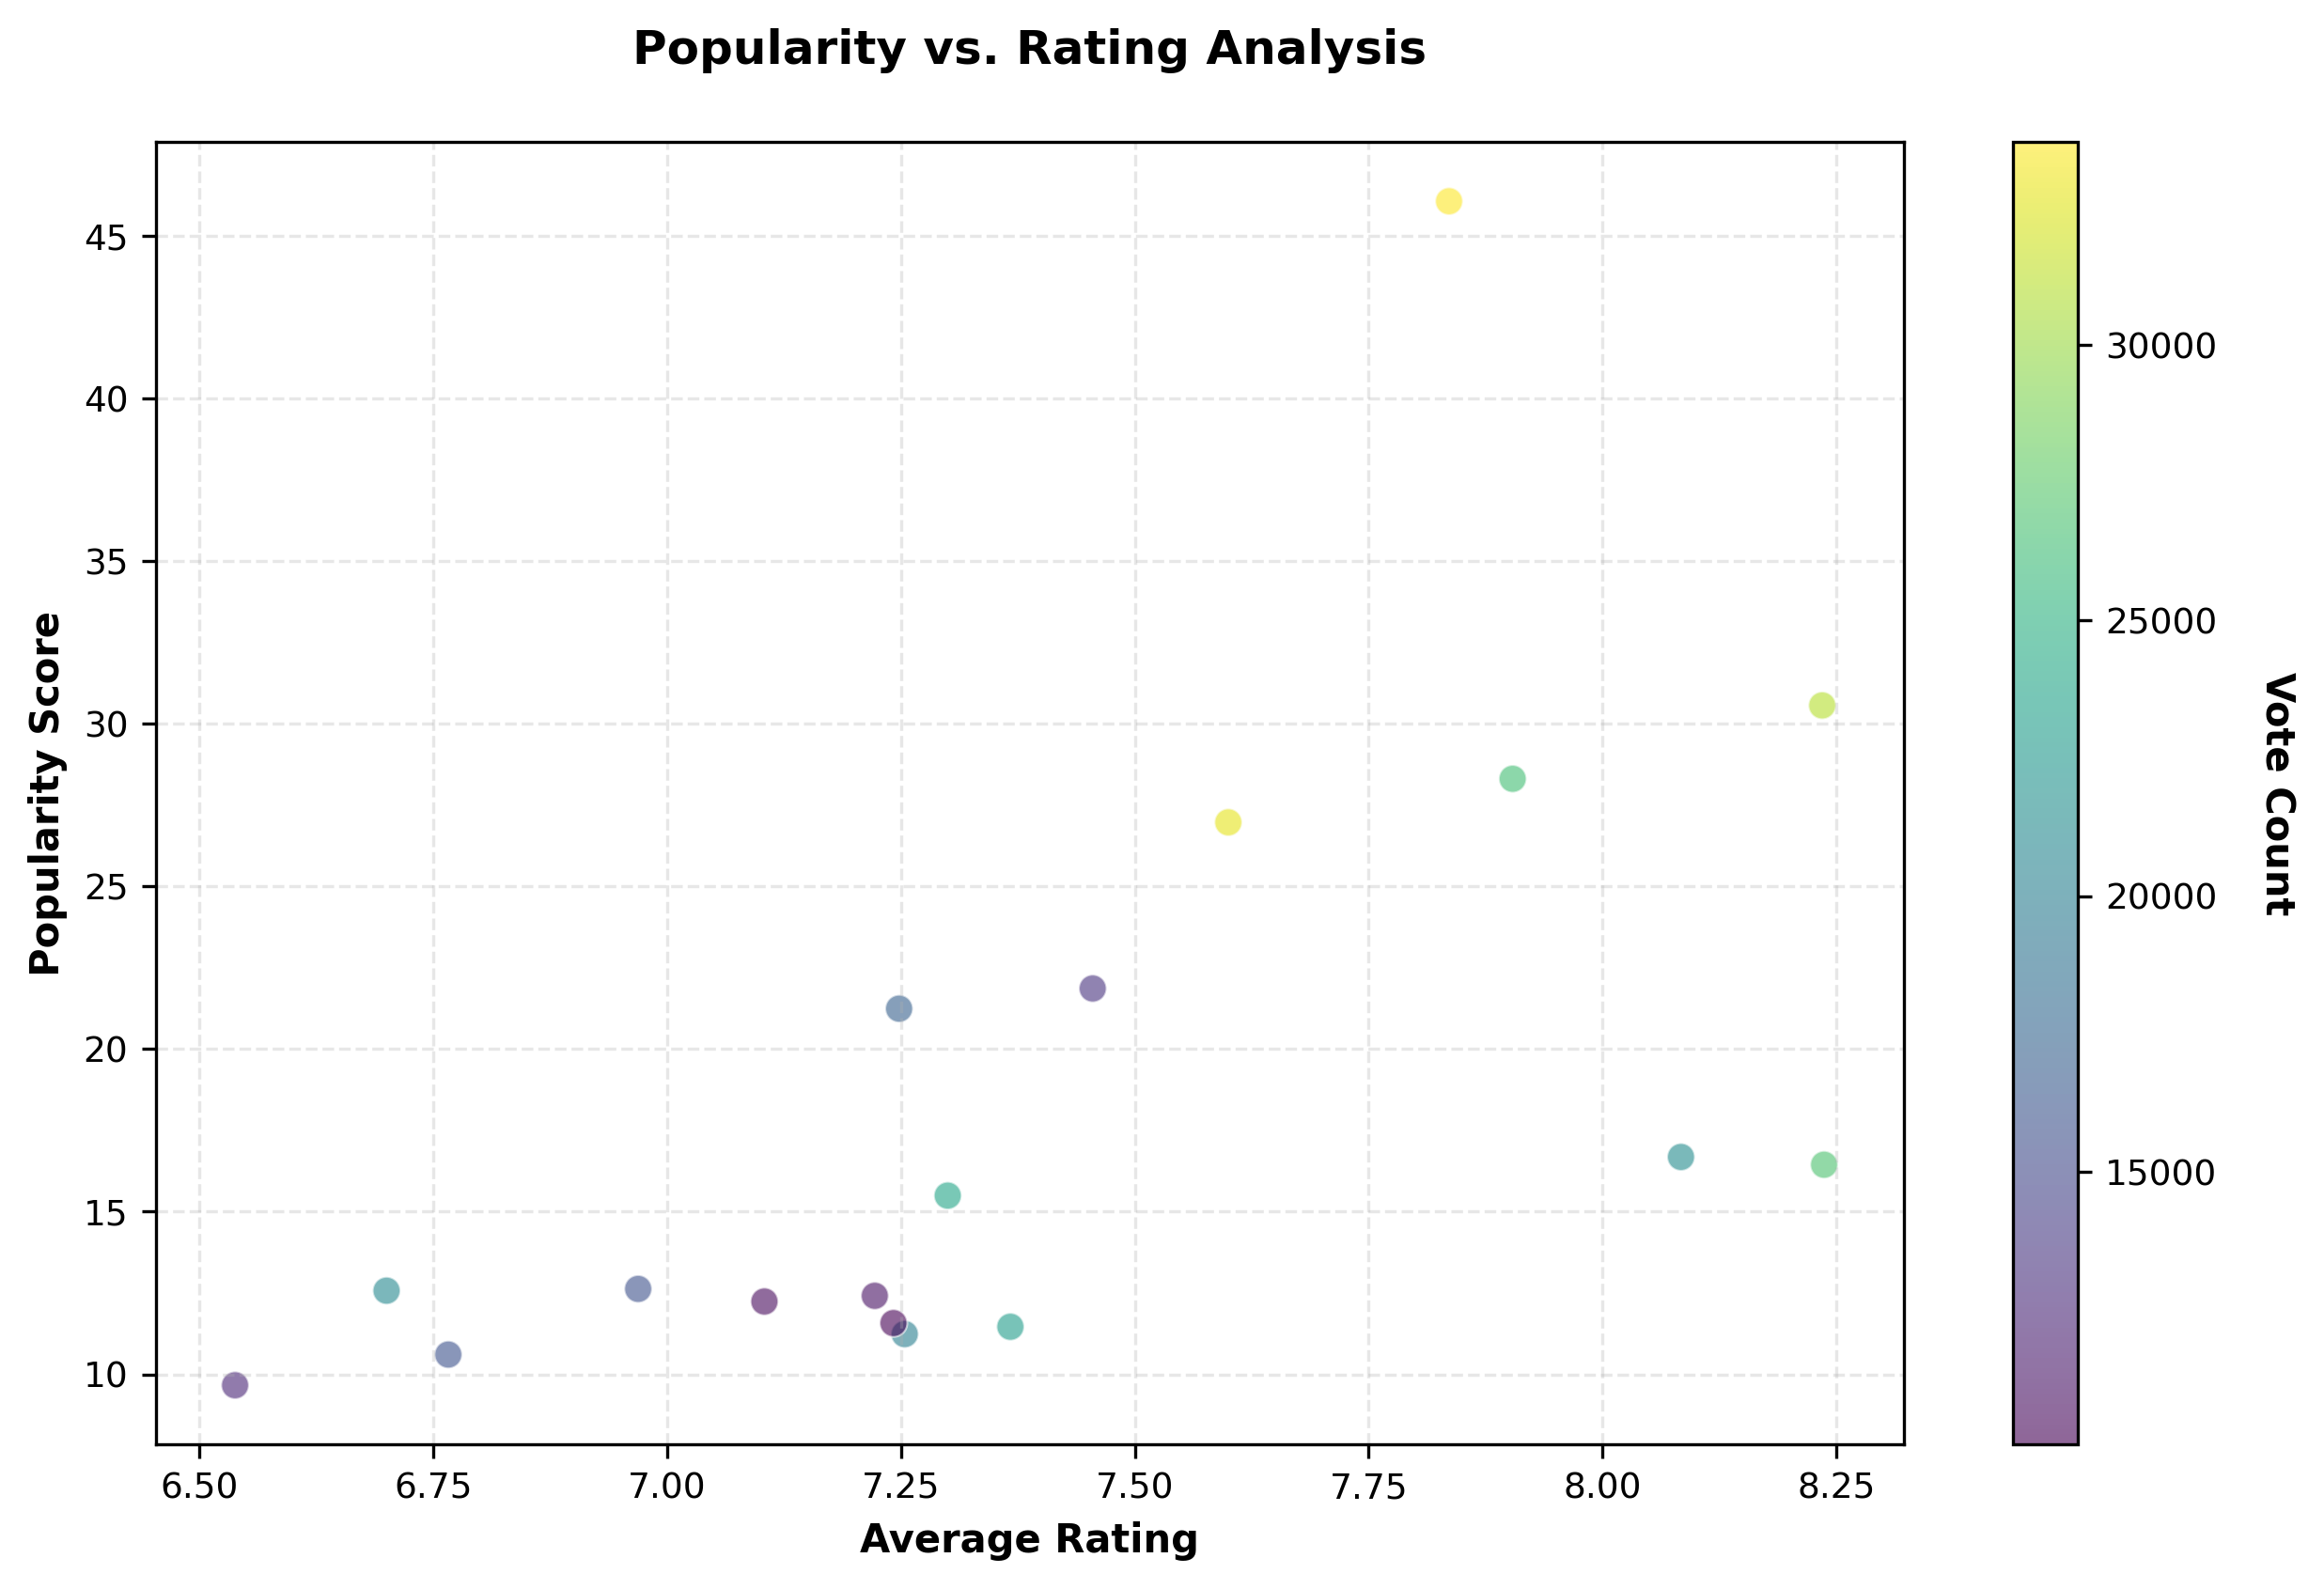

In [12]:
viz_path = Path.cwd() / 'data' / 'visualizations' / 'popularity_vs_rating.png'
if viz_path.exists():
    display(Image(filename=str(viz_path)))

### Visualization 4: Yearly Box Office Trends

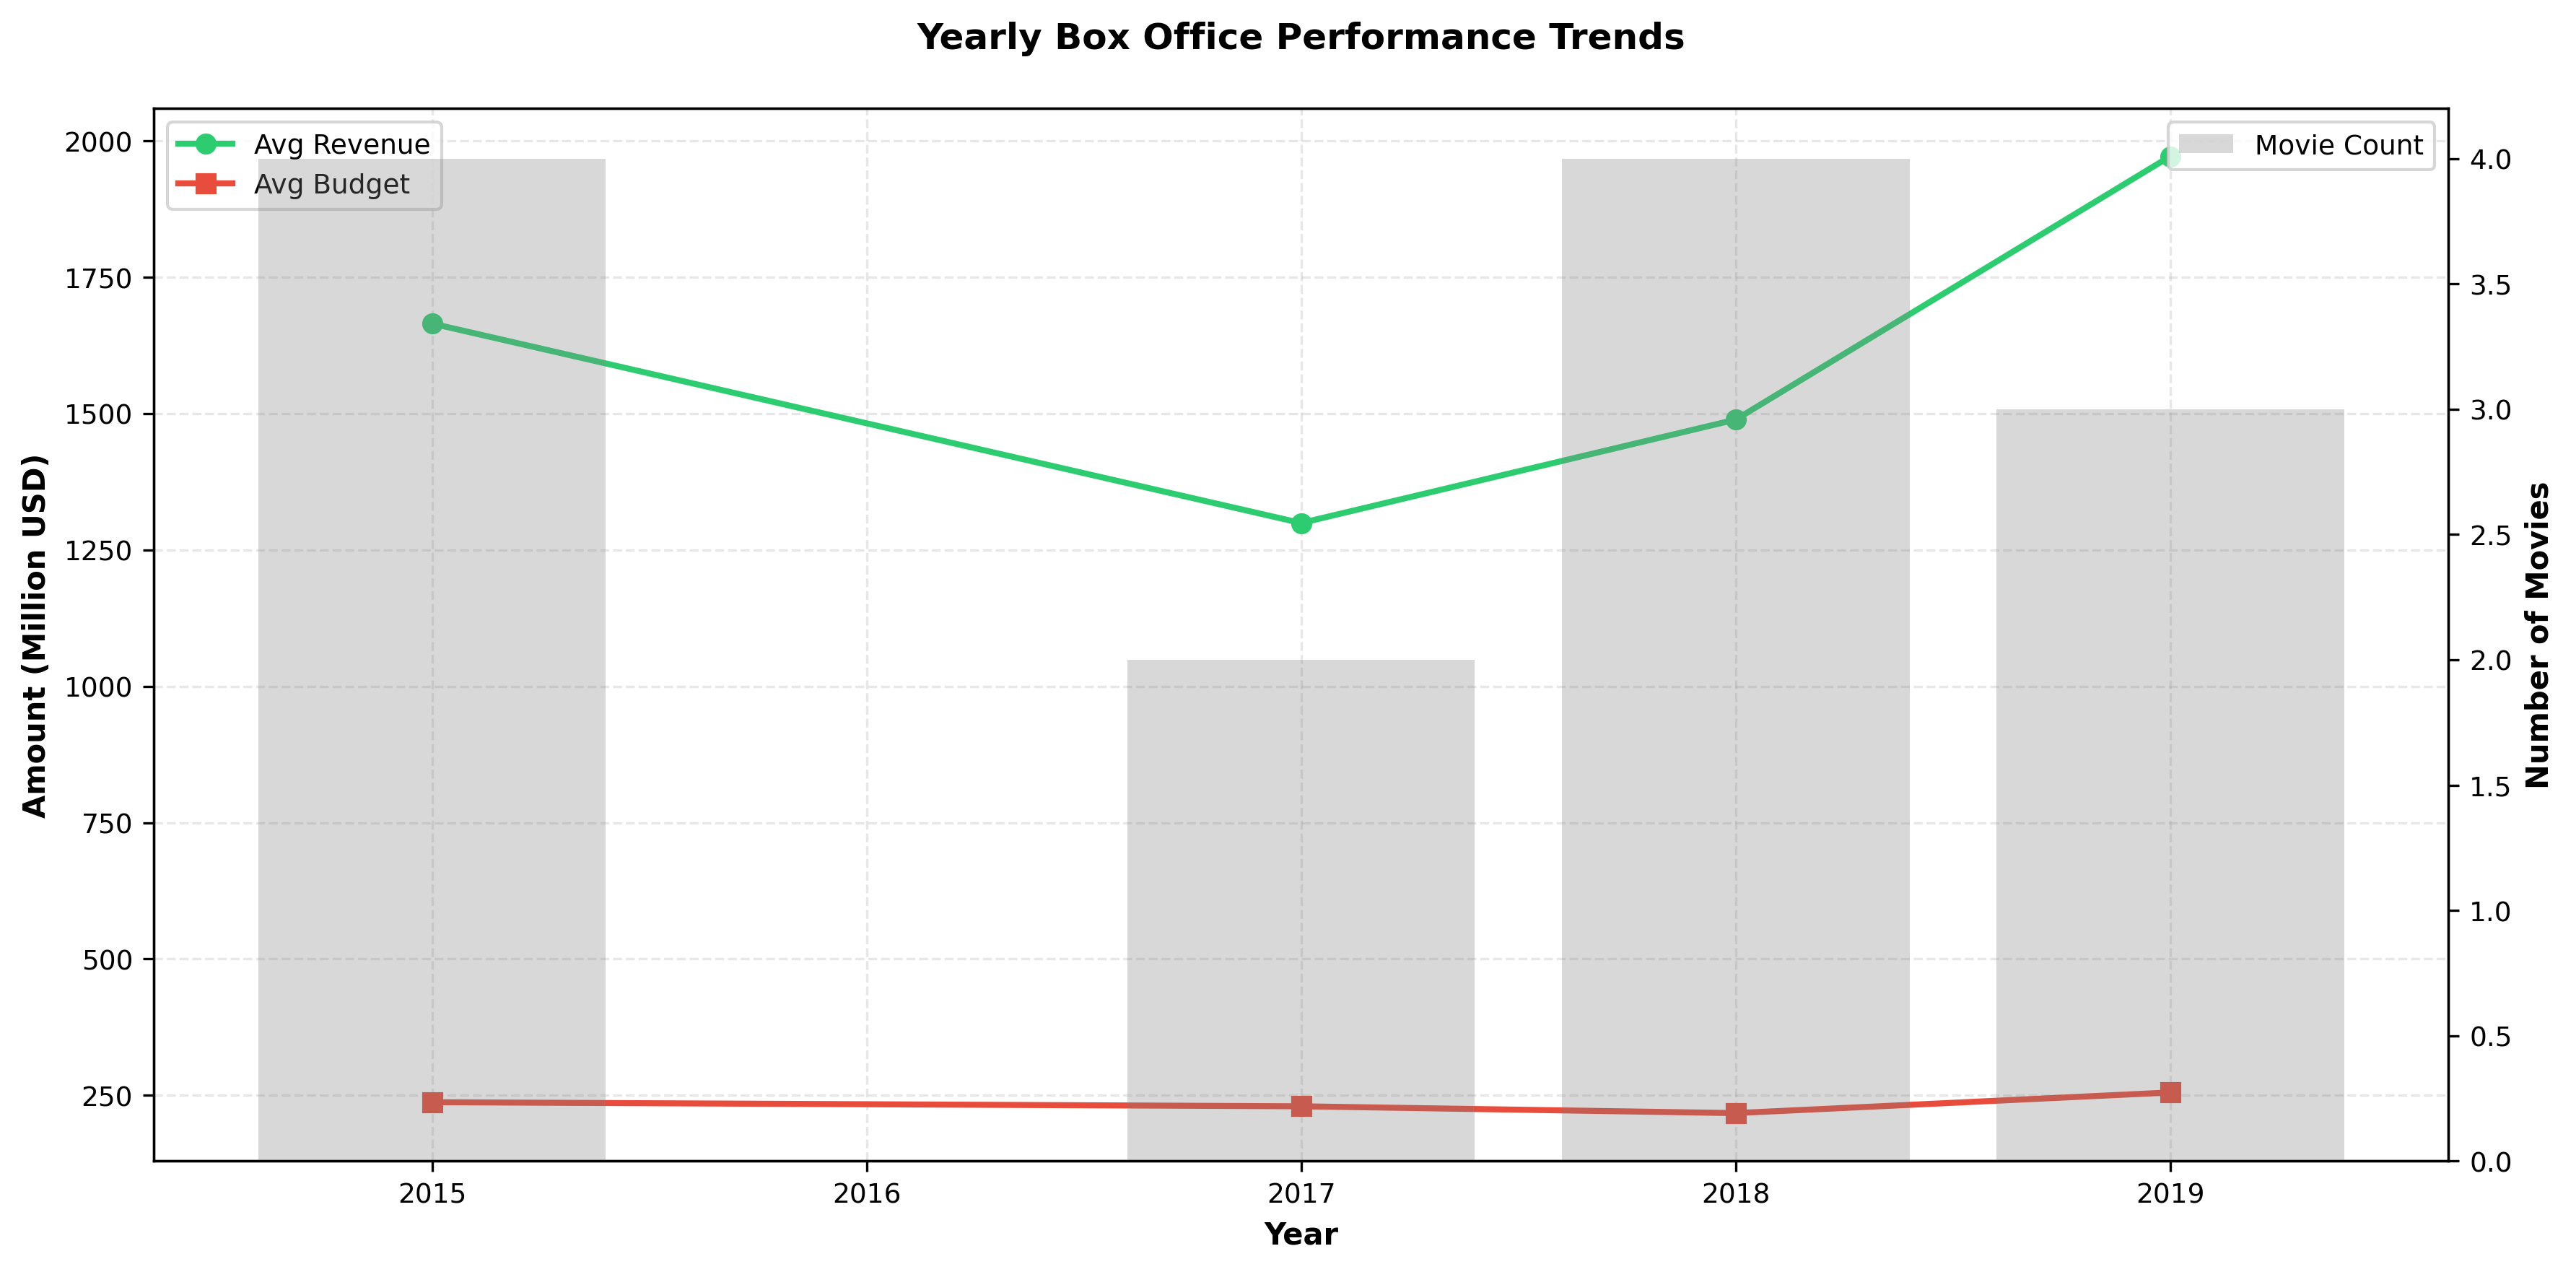

In [13]:
viz_path = Path.cwd() / 'data' / 'visualizations' / 'yearly_trends.png'
if viz_path.exists():
    display(Image(filename=str(viz_path)))

### Visualization 5: Franchise vs Standalone Comparison

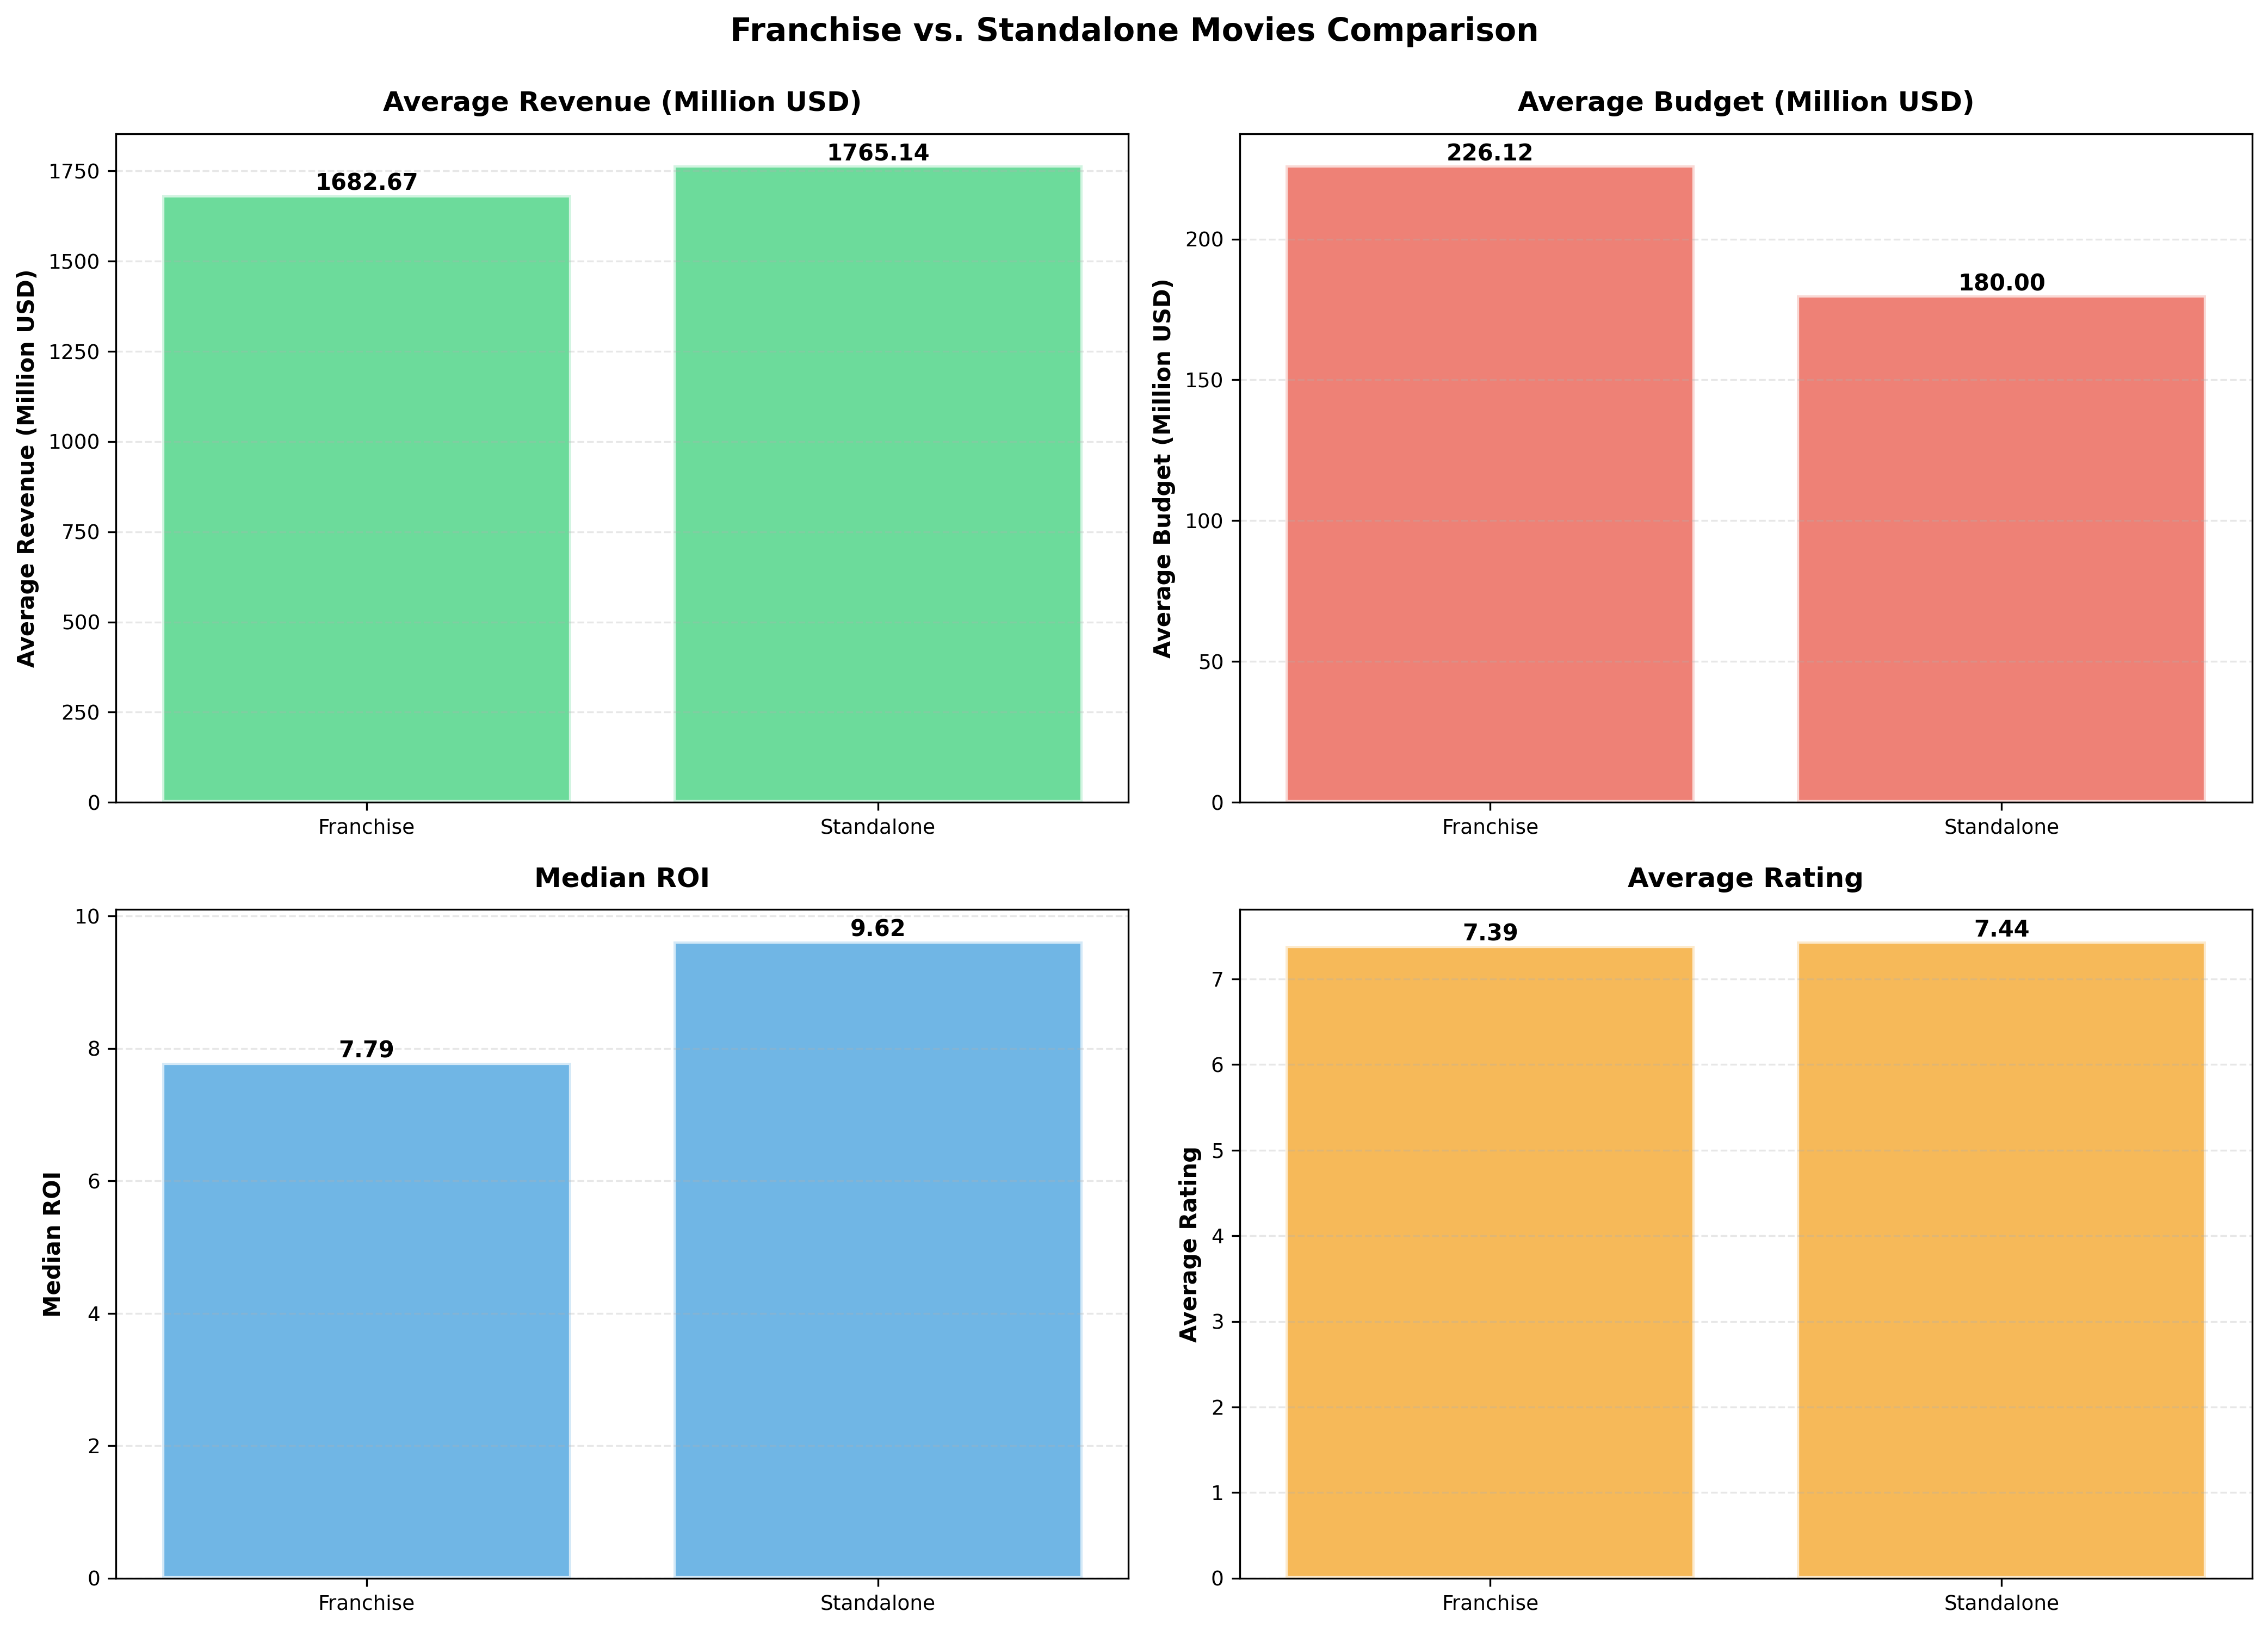

In [14]:
viz_path = Path.cwd() / 'data' / 'visualizations' / 'franchise_vs_standalone.png'
if viz_path.exists():
    display(Image(filename=str(viz_path)))

---

## Key Insights & Findings

### Financial Performance Insights

In [15]:
insights = df_cleaned[['budget_musd', 'revenue_musd']].dropna()
if not insights.empty:
    avg_budget = insights['budget_musd'].mean()
    avg_revenue = insights['revenue_musd'].mean()
    avg_profit = (insights['revenue_musd'] - insights['budget_musd']).mean()
    
    print("💰 Financial Metrics Summary:")
    print(f"   • Average Budget: ${avg_budget:.2f}M")
    print(f"   • Average Revenue: ${avg_revenue:.2f}M")
    print(f"   • Average Profit: ${avg_profit:.2f}M")
    print(f"   • Average Return Multiplier: {avg_revenue/avg_budget:.2f}x")

💰 Financial Metrics Summary:
   • Average Budget: $221.00M
   • Average Revenue: $1691.83M
   • Average Profit: $1470.83M
   • Average Return Multiplier: 7.66x


### Genre Performance Insights

In [16]:
if 'genres' in df_cleaned.columns:
    genre_df = df_cleaned.dropna(subset=['genres']).copy()
    genre_df['genre_list'] = genre_df['genres'].str.split(' | ')
    exploded = genre_df.explode('genre_list')
    
    print(" Top 5 Most Common Genres:")
    print(exploded['genre_list'].value_counts().head())
    
    if 'revenue_musd' in df_cleaned.columns:
        genre_revenue = exploded.groupby('genre_list')['revenue_musd'].mean().sort_values(ascending=False)
        print("\n Top 5 Genres by Average Revenue:")
        print(genre_revenue.head())

 Top 5 Most Common Genres:
genre_list
|            42
Adventure    15
Action       12
Science      10
Fiction      10
Name: count, dtype: int64

 Top 5 Genres by Average Revenue:
genre_list
Drama      1963.091586
Fiction    1843.263439
Science    1843.263439
Action     1765.938338
Romance    1765.139159
Name: revenue_musd, dtype: float64


### Rating and Popularity Insights

In [17]:
if 'vote_average' in df_cleaned.columns and 'popularity' in df_cleaned.columns:
    correlation = df_cleaned[['vote_average', 'popularity']].corr().iloc[0, 1]
    
    print("⭐ Rating & Popularity Insights:")
    print(f"   • Average Rating: {df_cleaned['vote_average'].mean():.2f}/10")
    print(f"   • Average Popularity Score: {df_cleaned['popularity'].mean():.2f}")
    print(f"   • Rating-Popularity Correlation: {correlation:.3f}")
    
    if correlation > 0.5:
        print("   • Finding: Strong positive correlation - popular movies tend to be highly rated")
    elif correlation < 0.2:
        print("   • Finding: Weak correlation - popularity doesn't guarantee high ratings")
    else:
        print("   • Finding: Moderate correlation between popularity and ratings")

⭐ Rating & Popularity Insights:
   • Average Rating: 7.39/10
   • Average Popularity Score: 18.22
   • Rating-Popularity Correlation: 0.614
   • Finding: Strong positive correlation - popular movies tend to be highly rated


---

## Methodology Summary



### Technologies Used

- **Python 3.13**: Core programming language
- **Pandas**: Data manipulation and analysis
- **Matplotlib**: Data visualization
- **NumPy**: Numerical computing
- **Requests**: API integration
- **TMDB API**: Data source

---





---

## How to Run This Project


```

### Run Options

**Option 1: Jupyter Notebook** (Interactive)
```bash
jupyter notebook TMDB_Movie_Analysis.ipynb
```

**Option 2: Python Script** (Automated)
```bash
python src/main.py
```

---
